Fitted Function:  y = 0.945x + -1.245


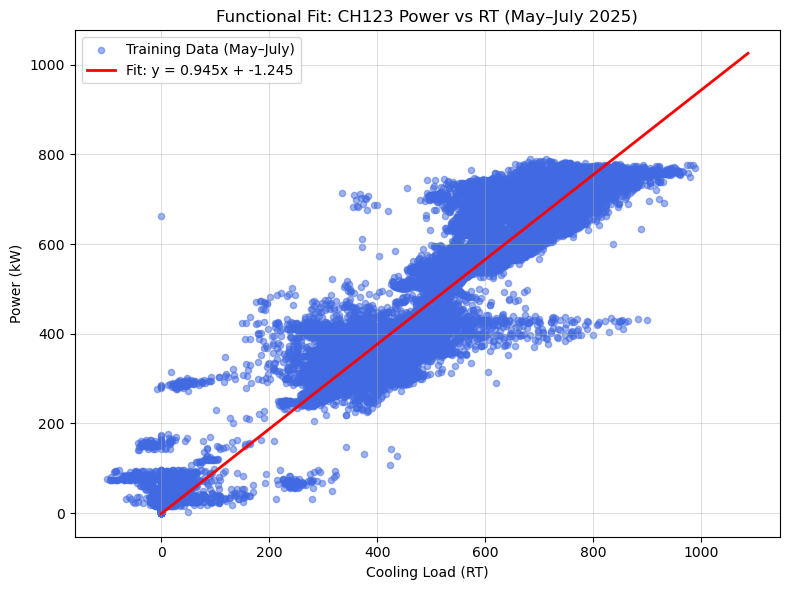

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

actual_path = r"C:\Users\QiYangWong\Downloads\merged_updated_v5.csv"
opt_path = r"C:\Users\QiYangWong\Downloads\chiller_schedule_optimized_Final10.csv"
save_folder = r"C:\Users\QiYangWong\Downloads\Amcorp Pic"
os.makedirs(save_folder, exist_ok=True)

df = pd.read_csv(actual_path, low_memory=False)
df["timestamp"] = pd.to_datetime(df["Date"].astype(str) + " " + df["Time"].astype(str),
                                 dayfirst=True, errors="coerce")
df = df.dropna(subset=["timestamp"]).set_index("timestamp").sort_index()
df["Total_RT"] = pd.to_numeric(df["Total_RT"], errors="coerce")
df["Power_CH123"] = pd.to_numeric(df["Power_CH123"], errors="coerce")

train_df = df.loc["2025-05-01":"2025-07-31"].dropna(subset=["Total_RT", "Power_CH123"])
x = train_df["Total_RT"].values
y = train_df["Power_CH123"].values
a, b = np.polyfit(x, y, 1)
print(f"Fitted Function:  y = {a:.3f}x + {b:.3f}")

x_fit = np.linspace(0, max(x)*1.1, 100)
plt.figure(figsize=(8,6))
plt.scatter(x, y, s=20, alpha=0.5, color="royalblue", label="Training Data (May–July)")
plt.plot(x_fit, a*x_fit + b, color="red", lw=2, label=f"Fit: y = {a:.3f}x + {b:.3f}")
plt.title("Functional Fit: CH123 Power vs RT (May–July 2025)")
plt.xlabel("Cooling Load (RT)")
plt.ylabel("Power (kW)")
plt.legend()
plt.grid(alpha=0.4)
plt.tight_layout()
plt.savefig(os.path.join(save_folder, "Graph1_Fitted_Function.png"), dpi=300)
plt.show()

